In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [2]:
import requests

API_KEY = 'ODD9QRDXB19W5S30'

1. american company:  FB Meta Platforms Inc

2. canadina company: SHOP.TRT - shopify

3. precious metals - GFI  - Gold Fields Ltd

4. real estate : CIGI - Colliers International Group Stock

5. travel sector : BKNG -  Booking Holdings Inc

In [3]:
df = pd.read_csv("aggregated_data.csv")
df.columns = ["Date", "Total deaths", "Total confirmed"]
df

,Date,Total deaths,Total confirmed
0,1/22/20,17,557
1,1/23/20,18,657
2,1/24/20,26,944
3,1/25/20,42,1437
4,1/26/20,56,2120
...,...,...,...
816,4/17/22,6198487,504619899
817,4/18/22,6199914,505089291
818,4/19/22,6203317,506082451
819,4/20/22,6207815,507046645


In [4]:
from datetime import datetime
# Below are quick example
# Convert datetype to string
df['Date']=df['Date'].astype(str)
df['Date']=pd.to_datetime(df['Date'].astype(str))

df


,Date,Total deaths,Total confirmed
0,2020-01-22,17,557
1,2020-01-23,18,657
2,2020-01-24,26,944
3,2020-01-25,42,1437
4,2020-01-26,56,2120
...,...,...,...
816,2022-04-17,6198487,504619899
817,2022-04-18,6199914,505089291
818,2022-04-19,6203317,506082451
819,2022-04-20,6207815,507046645


In [5]:
df.set_index('Date', inplace=True)
df

,Total deaths,Total confirmed
Date,,
2020-01-22,17,557
2020-01-23,18,657
2020-01-24,26,944
2020-01-25,42,1437
2020-01-26,56,2120
...,...,...
2022-04-17,6198487,504619899
2022-04-18,6199914,505089291
2022-04-19,6203317,506082451


### Meta Platforms Inc

In [6]:
ts = TimeSeries(key='API_KEY', output_format='pandas')
data, meta = ts.get_daily(symbol='FB',outputsize='full')

data.sort_values(by='date', ascending=True, inplace=True)
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2012-05-18,42.050,45.0000,38.00,38.2318,573576400.0
2012-05-21,36.530,36.6600,33.00,34.0300,168192700.0
2012-05-22,32.610,33.5900,30.94,31.0000,101786600.0
2012-05-23,31.370,32.5000,31.36,32.0000,73600000.0
2012-05-24,32.950,33.2100,31.77,33.0300,50237200.0
...,...,...,...,...,...
2022-04-18,210.000,213.3800,208.30,210.7700,16580792.0
2022-04-19,210.520,218.4299,209.00,217.3100,20089871.0
2022-04-20,213.605,214.1600,198.92,200.4200,42859593.0


In [7]:
data.tail(3)
data = data.drop(index='2022-04-22')
data.tail(3)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-19,210.520,218.4299,209.00,217.31,20089871.0
2022-04-20,213.605,214.1600,198.92,200.42,42859593.0
2022-04-21,201.600,202.9650,185.58,188.07,49954078.0


In [9]:
data = data.drop(data.index[0:1930])



In [10]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-01-22,222.31,222.750,221.28,221.32,12212814.0
2020-01-23,220.75,221.485,219.27,219.76,11195000.0
2020-01-24,220.80,221.780,216.11,217.94,11905824.0
2020-01-27,213.10,216.060,212.50,214.87,13810655.0
2020-01-28,216.14,218.740,213.52,217.79,13413835.0


In [11]:
data.columns = ["open", "FB-High", "FB-Low", "close" ,"volume"]
data

,open,FB-High,FB-Low,close,volume
date,,,,,
2020-01-22,222.310,222.7500,221.28,221.32,12212814.0
2020-01-23,220.750,221.4850,219.27,219.76,11195000.0
2020-01-24,220.800,221.7800,216.11,217.94,11905824.0
2020-01-27,213.100,216.0600,212.50,214.87,13810655.0
2020-01-28,216.140,218.7400,213.52,217.79,13413835.0
...,...,...,...,...,...
2022-04-14,214.890,214.9900,210.00,210.18,18379455.0
2022-04-18,210.000,213.3800,208.30,210.77,16580792.0
2022-04-19,210.520,218.4299,209.00,217.31,20089871.0


In [12]:
data = data.drop(["open","close","volume"], axis=1)
data

,FB-High,FB-Low
date,,
2020-01-22,222.7500,221.28
2020-01-23,221.4850,219.27
2020-01-24,221.7800,216.11
2020-01-27,216.0600,212.50
2020-01-28,218.7400,213.52
...,...,...
2022-04-14,214.9900,210.00
2022-04-18,213.3800,208.30
2022-04-19,218.4299,209.00


In [14]:
#This is will keep all data and fill Nan where it's missing 
# shopify_res = pd.concat([df, data], axis=1)

#This is will keep only the filled data - and remove empty cells
FB_res = pd.concat([data, df], axis=1, join="inner")
FB_res

,FB-High,FB-Low,Total deaths,Total confirmed
2020-01-22,222.7500,221.28,17,557
2020-01-23,221.4850,219.27,18,657
2020-01-24,221.7800,216.11,26,944
2020-01-27,216.0600,212.50,82,2929
2020-01-28,218.7400,213.52,131,5580
...,...,...,...,...
2022-04-14,214.9900,210.00,6193401,502932802
2022-04-18,213.3800,208.30,6199914,505089291
2022-04-19,218.4299,209.00,6203317,506082451
2022-04-20,214.1600,198.92,6207815,507046645


## Plot

<Figure size 1440x1440 with 0 Axes>

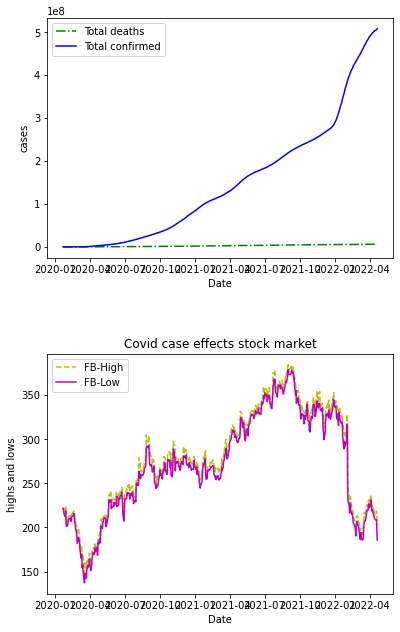

In [15]:
x = np.arange(0, 565,1)


s1 = FB_res["Total deaths"]
s2 = FB_res["Total confirmed"]
s3 = FB_res["FB-High"]
s4 = FB_res["FB-Low"]

plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 1)
axs[0].plot(s1, 'g-.', label="Total deaths")
axs[0].plot(s2, 'b-', label="Total confirmed")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('cases')               
axs[0].legend()

axs[1].plot(s3, 'y--', label="FB-High")
axs[1].plot(s4, 'm', label="FB-Low")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('highs and lows')
axs[1].legend()




plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
plt.title("Covid case effects stock market")

plt.show()

